# A remplir (mettre aussi votre nom dans le titre du fichier)
Nom : 
Prénom : 

<h1>Partiel d'optimisation M1 MMA du 16/11/2020. Durée 2h</h1>

Tous les documents du cours sont autorisés. Uploadez ce fichier ainsi que vos documents annexes de réponses (si vous en avez) sur Moodle avant l'heure limite de rendu.
Pensez à :
<ul>
    <li>sauvegarder régulièrement ce document (disquette en haut à gauche),</li>
    <li>n'attendez pas la dernière minute pour remettre vos fichiers. Aucun dépassement ne sera autorisé (sauf cas exceptionnel).</li>
</ul>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
params = {'tex.usetex': True}

t = 2*np.pi*np.random.rand()
u = np.array([np.cos(t), np.sin(t)])

On considère donnée une famille de couples $((x_i,y_i))_{0\leq i\leq M-1}$ où pour tout $i$, $x_i$ est un point du plan $\mathbb{R}^2$ et $y_i\in\{-1,1\}$ défini l'appartenance de $x_i$ à une des deux classes représentées par les nombres $-1$ et $1$.

Les couples $((x_i,y_i))_{0\leq i\leq M-1}$ sont une réalisation d'un échantillon de taille $M$ de la variable aléatoire $(X,Y)$ à valeurs dans $\mathbb{R}^2\times\{-1,1\}$, c'est-à-dire une réalisation de $M$ variables aléatoires indépendantes $(X_i,Y_i)$ de même loi que le couple $(X,Y)$.

Une réalisation de la variable $(X,Y)$ est donnée par la fonction $\mbox{genererCouple}$ suivante :

In [2]:
def genererCouple():
    # renvoie une réalisation de la variable aléatoire (X,Y)
    if np.random.rand() < 0.5:
        x, y = 2.*np.random.randn(2) + 3*u, -1 # bleu
    else:
        x, y = 2.*np.random.randn(2) - 3*u, 1 # rouge
    return [x, y]

La case suivante génère les données fixées du problème $((x_i,y_i))_{0\leq i\leq M-1}$ et les affiches graphiquement. La population de type "-1" (c'est-à-dire les $x_i$ tels que $y_i=-1$) est affichée en bleu et celle de type "1" en rouge. Les $x_i$ sont stockés dans un vecteur $\mbox{xv}$ et les $y_i$ dans un vecteur $\mbox{yv}$.

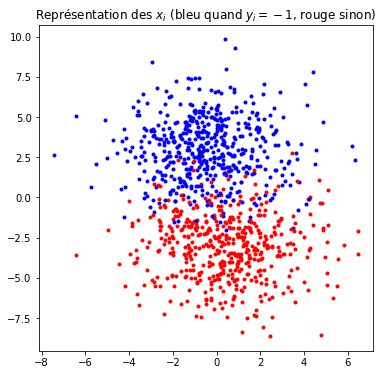

In [3]:
M = 1000
xv, yv = np.zeros((M, 2)), np.zeros(M)
for i in range(M):
    xv[i, :], yv[i] = genererCouple() # on stocke les données ((x_i, y_i))_i

# affichage
plt.figure(figsize = (6, 6))
for i in range(M):
    if yv[i] == 1: # si x_i est de type 1 alors on affiche un point rouge
        plt.plot(xv[i,0], xv[i, 1], linestyle = "none", Marker = '.', color = "red")
    else:
        plt.plot(xv[i,0], xv[i, 1], linestyle = "none", Marker = '.', color = "blue")
plt.title(r"Représentation des $x_i$ (bleu quand $y_i=-1$, rouge sinon)")
plt.axis("tight")
plt.show()

L'objectif de ce sujet est, à partir des données d'entraînement ci-dessus $((x_i,y_i))_{0\leq i\leq M-1}$, d'apprendre à prédire, sachant uniquement une nouvelle valeur $x\in\mathbb{R}^2$ de $X$, la valeur du $y$ associé (c'est-à-dire la couleur du point $x$).

Pour cela on va déterminer la meilleur droite passant par $(0,0)$ qui sépare les deux populations (rouge et bleu) des données.

Une droite qui passe par $(0,0)$ a pour équation $f(x) = 0$ où $f : x\in\mathbb{R}^2 \mapsto \alpha_0 x_0 + \alpha_1 x_1$ avec $\alpha = (\alpha_0, \alpha_1)\in\mathbb{R}^2$ un vecteur normal de la droite.

1) Déterminer le gradient de $f$ en $x$. Commenter.

Le gradient de f en tout x est le vecteur alpha : la normale à la droite passant par (0,0). C'est logique, cf 3).

2) Afficher les lignes de niveau de la fonction $\mbox{f}$ définie ci dessous.

In [4]:
alpha = [1, -1] # vecteur normal à la droite
def f(x):
    return x[0]*alpha[0] + x[1]*alpha[1]

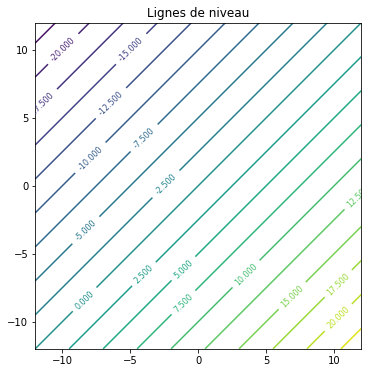

In [5]:
X0 = np.linspace(-12, 12, 100)
X1 = np.linspace(-12, 12, 100)
X0, X1 = np.meshgrid(X0, X1)
Z = f([X0, X1])

# Graphique des lignes de niveaux
fig, ax = plt.subplots(figsize = (6, 6))
CS = ax.contour(X0, X1, Z, 20)
ax.clabel(CS, fontsize = 8)
ax.set_title('Lignes de niveau')
ax.set_aspect('equal', adjustable = 'box') # pour que les axes aient la même échelle

3) A quoi correspond sur le graphe ci-dessus la droite de vecteur normal $\mbox{alpha}$ passant par $(0,0)$ ?

C'est la droite à laquelle on s'intéresse. alpha est le gradient de f, on sait que le gradient en un point est orthogonal à la ligne de niveau de la fonction passant par ce point. Il est donc logique que alpha soit un vecteur normal.

Notons aussi que toutes les lignes de niveau sont parallèles. C'est parce que le gradient de f (alpha le vecteur normal à la droite passant par (0,0)) est constant. Toutes les lignes de niveau sont parallèles à la droite passant par (0,0).

A direction fixée, plus alpha est grand (en norme), plus les lignes de niveau sont resserées. Dans le problème qui nous intéresse ici, il est à la fois question de trouver la bonne direction pour la droite (ie la bonne direction pour alpha le vecteur normal) mais aussi la bonne norme de alpha car plus on est loin de la droite passant par (0,0) plus on a confiance en la prédiction de l'appartenance à x à une des deux populations. Notons tout de même que pour simplifier la discussion, la prédiction se fera uniquement sur le signe de f(x) (seul l'information sur la direction de alpha sera utilisée).

L'idée est donc de trouver la meilleure orientation (paramétrée par $\alpha$) des lignes de niveau de $f$ de sorte qu'un $x$ (venant de $X$) qui se situerait dans le demi-plan où $f$ prend des valeurs négatives, respectivement positives, serait associé à la prédiction $-1$ (couleur bleu), respectivement $1$ (couleur rouge), pour $y$.

Pour déterminer cette meilleure orientation $\alpha\in\mathbb{R}^2$, nous allons chercher à résoudre le problème d'optimisation suivant : 
$$
    \min_{\alpha\in\mathbb{R}^2} \ F(\alpha), \quad \mbox{ où } F:\alpha\in\mathbb{R}^2\mapsto \lambda \|\alpha\|_2^2 + \frac1M \sum_{i=0}^{M-1} \log(1 + e^{-y_i (\alpha_0 x_{i,0} + \alpha_1 x_{i,1})}),
$$
où $\lambda > 0$ est un paramètre fixé et les $x_i = (x_{i,0}, x_{i,1})\in\mathbb{R}^2$ et $y_i\in\{-1,1\}$ sont les données du problème. Ici $\log$ représente le logarithme népérien.

(On ne discutera pas dans ce sujet de pourquoi on choisit ce $F:\alpha\in\mathbb{R}^2\to\mathbb{R}$).

<h3>Etude théorique du problème d'optimisation</h3>

On prendra soin à bien justifier les réponses.

4) Démontrer que si $g:\mathbb{R}^m\to\mathbb{R}$ est convexe et $f:\mathbb{R}^n\to\mathbb{R}$ est telle que $f(x) = g(Ax + b)$ avec $A\in\mathcal{M}_{m,n}(\mathbb{R})$ et $b\in\mathbb{R}^m$ alors $f$ est convexe.

5) Démontrer que $F$ est strictement convexe.

6) Que peut-on en déduire sur la matrice Hessienne de $F$ en $\alpha\in\mathbb{R}^2$ quelconque ?

7) Démontrer que $F$ est coercive.

8) Démontrer que $F$ admet un unique minimum global que l'on notera $\alpha^*$ dans la suite.

9) Est-ce que $F$ peut admettre un maximum local ?

<h3>Résolution numérique du problème d'optimisation</h3>

10) Ecrire en Python une fonction $\mbox{F}$ prenant en argument $\mbox{alpha}$ et représentant la fonction objective. Le paramètre $\lambda$ est fixé à $0.05$. (Indication : pour une implémentation rapide du vecteur $(\alpha_0 x_{i,0} + \alpha_1 x_{i,1})_{0\leq i \leq M-1}$, on pourra utiliser la commande $\mbox{np.dot(xv, alpha)}$ plutôt que d'écrire une boucle).

In [6]:
λ = 0.05
def F(alpha):
    y_alpha = np.dot(xv, alpha)
    #### écriture alternative mais bien plus lente ####
    # y_alpha = np.zeros(len(yv))
    # for i in range(M):
    #     y_alpha[i] = xv[i, 0]*alpha[0] + xv[i, 1]*alpha[1]
    ########
    L = np.log(1 + np.exp(-yv*y_alpha))
    return λ*np.dot(alpha, alpha) + np.sum(L)/M

11) Afficher les lignes de niveau de $F$ sur le domaine $[-3, 2]\times[-3, 0.5]$. (Indication : pour stocker ici les valeurs prises par $F$ dans une matrice Z, on fera une double boucle)

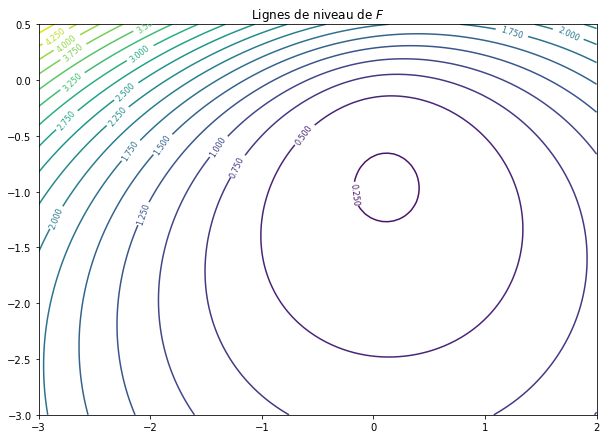

In [7]:
# Definition des grilles et evaluation de f
s = 100
al0 = np.linspace(-3, 2, s)
al1 = np.linspace(-3, 0.5, s)
al0, al1 = np.meshgrid(al0, al1)
Z = np.zeros((s, s))
for i in range(s):
    for j in range(s):
        Z[i, j] = F([al0[i, j], al1[i, j]])

# Graphique des lignes de niveaux
fig, ax = plt.subplots(figsize = (10, 10))
CS = ax.contour(al0, al1, Z, 20)
ax.clabel(CS, fontsize = 8)
ax.set_title(r'Lignes de niveau de $F$')
ax.set_aspect('equal', adjustable = 'box')

12) Calculer le gradient de $F$ en $\alpha\in\mathbb{R}^2$ : $\nabla F(\alpha)$.

13) Ecrire en Python une fonction $\mbox{gradF}$ prenant en argument $\mbox{alpha}$ et représentant le gradient de $F$.

In [13]:
def gradF(alpha):
    # implémentation rapide
    y_alpha = np.dot(xv, alpha)
    a = np.exp(-y_alpha*yv)
    b = -yv*a/(1 + a)
    return 1/M*np.array([np.dot(b, xv[:, 0]), np.dot(b, xv[:, 1])]) + 2*λ*np.array(alpha)
def gradF_naif(alpha):
    # implémentation simple mais nettement plus lente
    return 1/M*np.array([np.sum([-yv[i]*xv[i, 0]*np.exp(-yv[i]*(np.dot(alpha, xv[i, :])))/(1 + np.exp(-yv[i]*(np.dot(alpha, xv[i, :])))) for i in range(M)]), np.sum([-yv[i]*xv[i, 1]*np.exp(-yv[i]*(np.dot(alpha, xv[i, :])))/(1 + np.exp(-yv[i]*(np.dot(alpha, xv[i, :])))) for i in range(M)])]) + 2*λ*np.array(alpha)


# Comparaison des temps d'évaluation du gradient en fonction de l'implémentation
import time
t = time.time()
for i in range(100):
    al = np.random.rand(2)
    gradF(al)
dt = time.time() - t
print('Implémentation rapide : ', dt)

t = time.time()
for i in range(100):
    al = np.random.rand(2)
    gradF_naif(al)
dt = time.time() - t
print('Implémentation lente : ', dt)
# Conclusion : il faut éviter les boucles en Python !

Implémentation rapide :  0.004486083984375
Implémentation lente :  1.1676101684570312


In [15]:
# Valider cette case pour vérifier que votre implémentation du gradient de F est correcte
alpha = np.random.rand(2)
epsilon = 1e-8
print("Cette quantité doit être de l\'ordre de 1e-8 : ", np.linalg.norm(gradF(alpha) - np.array([(F(alpha + epsilon*np.array([1,0])) - F(alpha))/(epsilon), (F(alpha + epsilon*np.array([0,1])) - F(alpha))/(epsilon)])))

Cette quantité doit être de l'ordre de 1e-8 :  5.243688136665522e-08


14) Ecrire en Python une fonction $\mbox{gradientPasConstant}$ prenant en argument $\mbox{gradF}$, le gradient de $F$, $\mbox{alpha_0}$, un point de départ, $\mbox{tau}$, un pas de descente, $\mbox{epsilon}$, une tolérance, et $\mbox{Niter}$, un nombre d'itérations maximum. La fonction reverra la valeur du dernier itéré ainsi que la liste des itérés successifs. On fera attention à évaluer la fonction $\mbox{gradF}$ le moins de fois possible.

La fonction $\mbox{gradientPasConstant}$ correspond à un algorithme de descente où à chaque itération la direction de descente est donnée par moins le gradient (en l'itéré courant) et où le pas de descente est choisi constant valant $\mbox{tau}>0$. Cette méthode s'appelle la méthode de la descente de gradient à pas constant.

In [16]:
def gradientPasConstant(gradF, α_0, tau = 0.5, ε = 1e-4, Niter = 10000):
    α_n, α_list = α_0, [α_0]
    for n in range(Niter):
        gF = gradF(α_n)
        if np.linalg.norm(gF) < ε:
            return α_n, α_list
        α_list.append(α_n)
        α_n = α_n - tau*gF
    print("Probleme, la descente de gradient n'a pas convergée après ", Niter," itérations.")
    return α_n, α_list

Dans la suite, on prendra $\mbox{tau}=0.5$.

15) Illustrer la converge de l'algorithme en utilisant la fonction $\mbox{plt.semilogy}$. (Indication : on utilisera d'abord l'algorithme avec une tolérance faible, par exemple $10^{-8}$, et on utilisera l'approximée obtenu comme limite de référence)

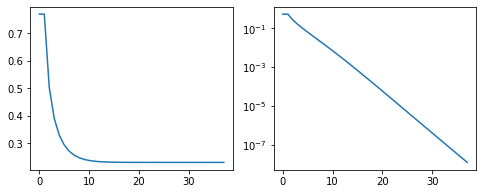

In [17]:
α_0 = [1.5, -0.5]
α_star, α_list = gradientPasConstant(gradF, α_0, tau = 0.5, ε = 1e-8)
α_opt, α_list = gradientPasConstant(gradF, α_0, tau = 0.5)

plt.figure(figsize = (8, 3))
plt.subplot(121)
plt.plot(range(len(α_list)), [F(α) for α in α_list])
plt.subplot(122)
plt.semilogy(range(len(α_list)),[abs(F(α) - F(α_star)) for α in α_list])
plt.show()

16) De quel type de convergence s'agit-il ? Justifier.

Convergence linéaire car on a log(erreur) = -r*log(k) + C, avec r>0, donc erreur = C'*c^k avec c = exp(-r) < 1.

17) Superposer la trajectoire obtenue via l'algorithme de descente avec les lignes de niveau de $F$.

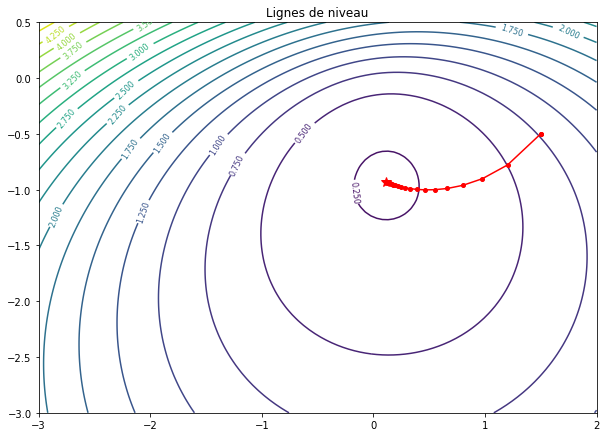

In [18]:
# Definition des grilles et evaluation de f
s = 100
al0 = np.linspace(-3, 2, s)
al1 = np.linspace(-3, 0.5, s)
al0, al1 = np.meshgrid(al0, al1)
Z = np.zeros((s, s))
for i in range(s):
    for j in range(s):
        Z[i, j] = F([al0[i, j], al1[i, j]])

# Graphique des lignes de niveaux
fig, ax = plt.subplots(figsize = (10, 10))
CS = ax.contour(al0, al1, Z, 20)
α_list_0 = [α_list[i][0] for i in range(len(α_list))]
α_list_1 = [α_list[i][1] for i in range(len(α_list))]
plt.plot(α_list_0, α_list_1, marker = "o", ms = 4.0, color = "red")
plt.plot(α_star[0], α_star[1], marker = '*', ms = 10.0, color = "r")
ax.clabel(CS, fontsize = 8)
ax.set_title('Lignes de niveau')
ax.set_aspect('equal', adjustable = 'box')

18) Définir la fonction $\mbox{f}$ comme en 2) qui cette fois correspond au $\mbox{alpha}$ optimal trouvé.

In [19]:
def f(x):
    return x[0]*α_star[0] + x[1]*α_star[1]

19) Superposer les lignes de niveau de $\mbox{f}$ au graphe affichant les deux populations (rouge, bleu) de points $x_i$ vu au début du sujet.

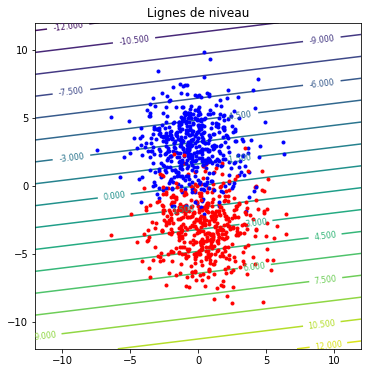

In [23]:
X0 = np.linspace(-12, 12, 100)
X1 = np.linspace(-12, 12, 100)
X0, X1 = np.meshgrid(X0, X1)
Z = f([X0, X1])

# Graphique des lignes de niveaux
fig, ax = plt.subplots(figsize = (6, 6))
CS = ax.contour(X0, X1, Z, 20)
for i in range(M):
    if yv[i] == 1:
        plt.plot(xv[i, 0], xv[i, 1], linestyle = "none", Marker = '.', color = "red")
    else:
        plt.plot(xv[i, 0], xv[i, 1], linestyle = "none", Marker = '.', color = "blue")
ax.clabel(CS, fontsize = 8)
ax.set_title('Lignes de niveau')
ax.set_aspect('equal', adjustable = 'box') # pour que les axes aient la même échelle

On remarque que la droite passant par (0,0) sépare bien les deux populations.

20) Ecrire une fonction qui renvoie la prédiction de $y$ ("$-1$" ou "$1$") en fonction d'un $x$ donné. On pensera à utiliser la fonction $\mbox{np.sign}$. Comparer la prédiction à la réalité en utilisant la fonction $\mbox{genererCouple}$ (qui renvoie un couple (x,y) réalisation de (X,Y)) de l'énoncé.

In [64]:
def prediction(x):
    return np.sign(f(x))

x, y = genererCouple()
print('x : ', x)
print('Vrai y : ', y)
print('Prédiction : ', prediction(x))

x :  [0.36315593 2.04893603]
Vrai y :  1
Prédiction :  -1.0


21) Déterminer le taux de succès de la méthode de prédiction.

In [53]:
def testSuccess():
    k = 0
    N = 100000
    for i in range(N):
        x, y = genererCouple()
        y_α = f(x)
        if abs(np.sign(y_α) - y) < 0.2:
            k +=1
    return k/N

print('Le taux de succès est : ', testSuccess())

Le taux de succès est :  0.93407


<h3>Etude de l'influence de $\lambda$</h3>

22) Décrire l'impact de $\lambda$ sur la vitesse de convergence de l'algorithme.

En testant l'algorithme pour plusieurs valeurs de lambda, on constate que l'algorithme converge plus rapidement quand lambda augmente.

23) Comment évoluent les lignes de niveau de $F$ en fonction de $\lambda$ ? Donner ensuite une explication qualitative.

On regardant les lignes de niveau de F quand lambda augmente, on remarque qu'elles ressemblent de plus en plus à des cercles. C'est parce que le terme qui domine dans la fonction objective, quand lambda augmente, est lambda*||alpha||^2 dont les lignes de niveau sont des cercles (vu en TD ou TP).

24) Comment évolue la performance de prédiction en fonction de $\lambda$. Expliquer ce comportement.

On peut observer numériquement que les performances de prédiction diminuent quand lambda augmente. C'est logique car le terme lambda*||alpha||^2 qui domine de plus en plus dans la fonction objective ne contient aucune information sur les données du problèmes (x_i, y_i).

25) On considère $G(x) = \lambda \|x\|_2^2$. Donner et démontrer une condition nécessaire et suffisante sur le pas de descente $\tau>0$ pour que la suite produite par la méthode de la descente de gradient à pas fixe (décrite précédemment) converge vers l'unique minimum global de $G$.

La CNS est 0 < tau <= 1/(2*lambda). Il suffit d'écrire la descente de gradient pour ce G et de voir que la suite obtenue converge ssi cette condition est vérifée.